In [115]:
print("this is a test")

this is a test


## import dataset and libraries

In [116]:
# %pip install kagglehub

In [117]:
# import kagglehub

# # Download latest version
# kaggle_path = kagglehub.dataset_download("jacopoferretti/wages-and-education-of-young-males-dataset")

# print("Path to dataset files:", kaggle_path)



## statistics and correlation analysis ## 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


In [119]:
path="./works/wages-and-education-of-young-males-dataset/Males.csv"
df=pd.read_csv(path)
df.head(10)


,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east
5,6,13,1985,14,6,no,other,no,no,1.699891,Business_and_Repair_Service,"Managers, Officials_and_Proprietors",north_east
6,7,13,1986,14,7,no,other,no,no,-0.720263,Business_and_Repair_Service,"Managers, Officials_and_Proprietors",north_east
7,8,13,1987,14,8,no,other,no,no,1.669188,Business_and_Repair_Service,"Managers, Officials_and_Proprietors",north_east
8,9,17,1980,13,4,no,other,no,no,1.675962,Trade,"Managers, Officials_and_Proprietors",north_east
9,10,17,1981,13,5,no,other,no,no,1.518398,Trade,"Managers, Officials_and_Proprietors",north_east


In [120]:
# infomation about dataset 
df.info()

# show the first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


In [121]:
# data cleaning
# df.isnull().sum()
null_percentage = df.isnull().mean() * 100
null_percentage_sorted = null_percentage.sort_values(ascending=False)
print(null_percentage_sorted)

# columns_with_missing = null_percentage[null_percentage > 30]
# print(columns_with_missing)


residence     28.555046
rownames       0.000000
nr             0.000000
year           0.000000
school         0.000000
exper          0.000000
union          0.000000
ethn           0.000000
maried         0.000000
health         0.000000
wage           0.000000
industry       0.000000
occupation     0.000000
dtype: float64


#### since residence is missing 28% of data.we will replace with N/A

In [122]:
df['residence'].fillna('N/A',inplace=True)

df.isnull().sum()



rownames      0
nr            0
year          0
school        0
exper         0
union         0
ethn          0
maried        0
health        0
wage          0
industry      0
occupation    0
residence     0
dtype: int64

In [123]:
# check duplicated rows

duplicated_rows = df[df.duplicated()]
print(duplicated_rows)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows (excluding first occurrence): {duplicate_count}")

Empty DataFrame
Columns: [rownames, nr, year, school, exper, union, ethn, maried, health, wage, industry, occupation, residence]
Index: []
Number of duplicated rows (excluding first occurrence): 0


## Exploratory Data Analysis (EDA)

first remove useless columns

In [124]:
df.drop(columns=['rownames'], inplace=True)


In [125]:
df.head()

,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


#### Summary statistics

In [126]:
df[['wage', 'school', 'exper']].describe()

,wage,school,exper
count,4360.000000,4360.000000,4360.000000
mean,1.649147,11.766972,6.514679
std,0.532609,1.746181,2.825873
min,-3.579079,3.000000,0.000000
25%,1.350717,11.000000,4.000000
50%,1.671143,12.000000,6.000000
75%,1.991086,12.000000,9.000000
max,4.051860,16.000000,18.000000


##### yearly survey count 

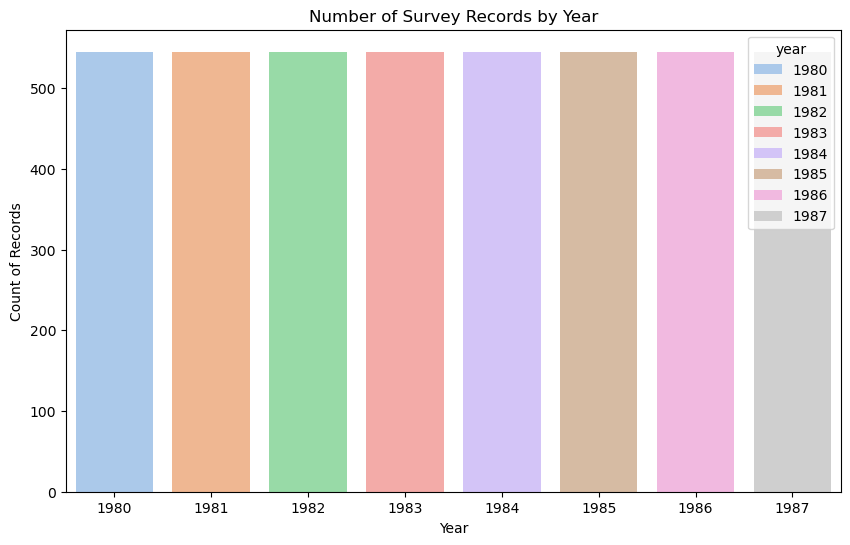

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='pastel',hue='year')
plt.title('Number of Survey Records by Year')
plt.xlabel('Year')
plt.ylabel('Count of Records')
plt.show()

In [128]:
print("Yearly Record Counts:",  df['year'].value_counts().sort_index().tolist())

Yearly Record Counts: [545, 545, 545, 545, 545, 545, 545, 545]


school  3   5   6   7   8   9   10  11   12  13  14  15  16
year                                                       
1980     1   2   5   2  18  17  47  92  231  54  41  31   4
1981     1   2   5   2  18  17  47  92  231  54  41  31   4
1982     1   2   5   2  18  17  47  92  231  54  41  31   4
1983     1   2   5   2  18  17  47  92  231  54  41  31   4
1984     1   2   5   2  18  17  47  92  231  54  41  31   4
1985     1   2   5   2  18  17  47  92  231  54  41  31   4
1986     1   2   5   2  18  17  47  92  231  54  41  31   4
1987     1   2   5   2  18  17  47  92  231  54  41  31   4


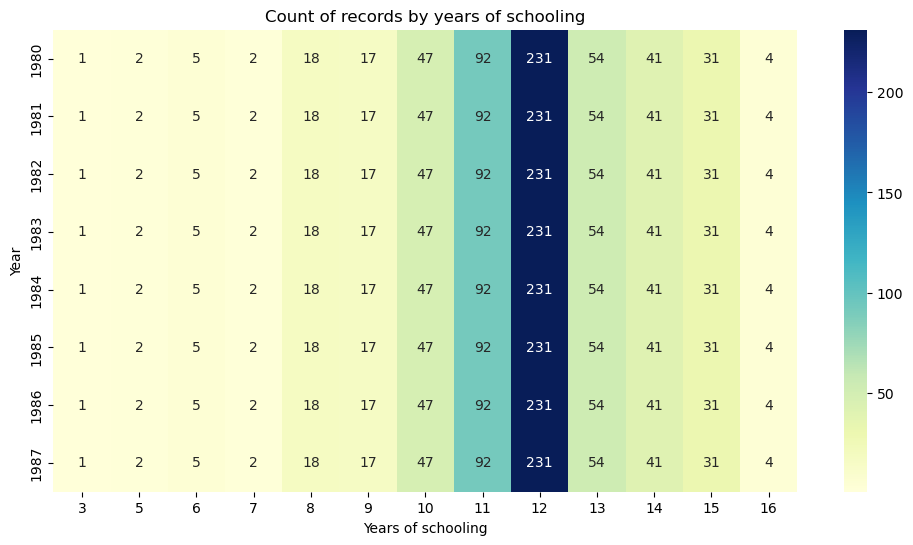

In [135]:
year_school_counts = df.groupby(['year', 'school']).size().unstack(fill_value=0)
# Display the counts
print(year_school_counts)
# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(year_school_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Count of records by years of schooling')
plt.xlabel('Years of schooling')
plt.ylabel('Year')
plt.show()

